<a href="https://www.kaggle.com/code/ashishkumarak/bm-25-from-scratch?scriptVersionId=169250024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## BM-25 : Best Match, Attempt 25
##### - Used in Information Retrieval, is a ranking function used to determine the relevance of documents to a query
##### - It's a kind of enhanced version of TF-IDF to balance the importance of query terms
##### - It normalizes document length to account for variations and prevent bias towards longer documents
##### - It assigns different weights to query terms based on their rarity and importance

## Consider the corpus as the list of documents

In [1]:
corpus = [
    'this is the first document.',
    'this is the first ',
   'this document is the second document.',
    'and this is the third one.',
    'is this the first document?',
 ]

## Scoring

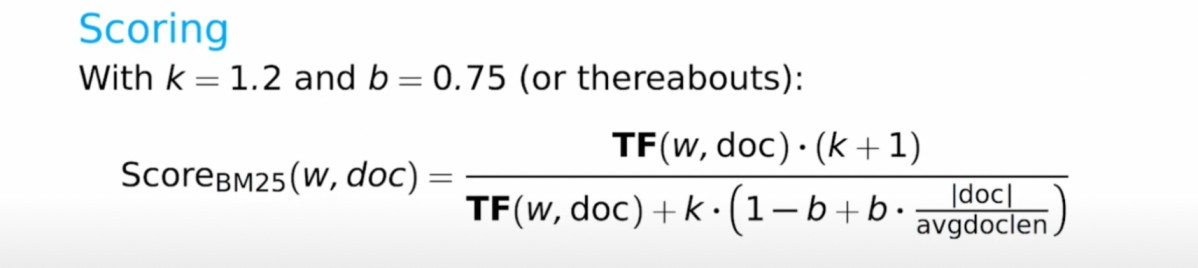

- k and b are hyperparameters
- |doc|/(avgdoclen) : penalizes long documents,as they contain lot of terms, but as an evidence we should trust that do contain less for overall relevance score
- b : controls the doc length penalty, higher the value, more the penalty
- k : Flattens out the higher frequencies
>- Lower k value (e.g. 0.001) : we're making the scoring function as indicator function, i.e. whether it appears or not
- avgdoclen : average of length of all documents

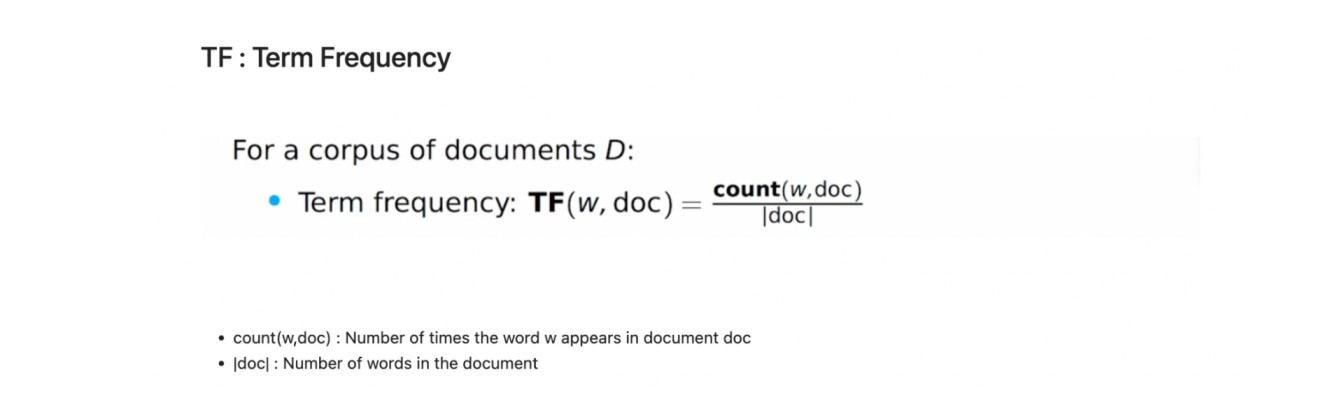

First let's remove puctuation from texts and  get all the distinct words from the documents : 

In [2]:
import re
def remove_punctuation(text):
  """Removes all punctuation from a string.

  Args:
    text: The string to remove punctuation from.

  Returns:
    A string with all punctuation removed.
  """

  pattern = re.compile(r'[^\w\s]')
  return pattern.sub(' ', text)

print(remove_punctuation(corpus[0]))

this is the first document 


Now let's get all the unique words from the corpus

In [3]:
unique_words = set()
for i in corpus : 
    only_txt = remove_punctuation(i)
    words = only_txt.split(' ')
    for j in range(len(words)-1) : 
        words[j] = words[j].lower()
        unique_words.add(words[j])   
unique_words_list = list(unique_words)
unique_words_list

['third', 'first', 'is', 'and', 'this', 'document', 'one', 'the', 'second']

#### Now this unique_words set is let's say the defining method for the (doc_id, word_index)
-> Word index for This : 0

-> Word index for document : 1
etc

We have two documents (TEXT lines) and let's say the index starts from 0
- Index for  'This is the first document.' : 0
- Index for  'This document is the second document.' : 1

#### Therefore count(0,1) means count of word "second" in the document "This is the first document"

### Calculating TF and storing them as a dictionary where keys are the tuples and values are the TF values

In [4]:
def tf(corpus) : 
    tf_dict = {}
    for i,doc in enumerate(corpus) : 
        txt = remove_punctuation(doc).split(' ')[:-1]
        len_doc = len(txt)
        for j, word in enumerate(unique_words_list) : 
                tf_dict[(i,j)] = txt.count(word)/len_doc
    return tf_dict

tf_dict = tf(corpus)

### Printing TF values


In [5]:
def print_words_tf():
    for l,k in tf_dict.keys() :  
        print(unique_words_list[k], tf_dict[(l,k)])
print_words_tf()

third 0.0
first 0.2
is 0.2
and 0.0
this 0.2
document 0.2
one 0.0
the 0.2
second 0.0
third 0.0
first 0.25
is 0.25
and 0.0
this 0.25
document 0.0
one 0.0
the 0.25
second 0.0
third 0.0
first 0.0
is 0.16666666666666666
and 0.0
this 0.16666666666666666
document 0.3333333333333333
one 0.0
the 0.16666666666666666
second 0.16666666666666666
third 0.16666666666666666
first 0.0
is 0.16666666666666666
and 0.16666666666666666
this 0.16666666666666666
document 0.0
one 0.16666666666666666
the 0.16666666666666666
second 0.0
third 0.0
first 0.2
is 0.2
and 0.0
this 0.2
document 0.2
one 0.0
the 0.2
second 0.0


### Avgdoclen

In [6]:
def avgdoclen(corpus) : 
    count = 0
    for i in corpus : 
        i = remove_punctuation(i)
        count += len(i.split(' '))
    return count/len(corpus)
avgdoclen(corpus)

6.2

## Scoring

In [7]:
def scoring(k =1.2, b = 0.75 , unique_words_list =unique_words_list, corpus = corpus ) : 
    scoring_dict = {}
    for i,doc in enumerate(corpus) : 
        txt = remove_punctuation(doc).split(' ')[:-1]
        len_doc = len(txt)
        for j, word in enumerate(unique_words_list) : 
                tfval = txt.count(word)/len_doc
                scoring_dict[(i,j)] = tfval*(k+1)/(tfval + k*(1-b+b*len_doc/avgdoclen(corpus)))
    return scoring_dict

scoring_dict = scoring()

## Smoothed IDF



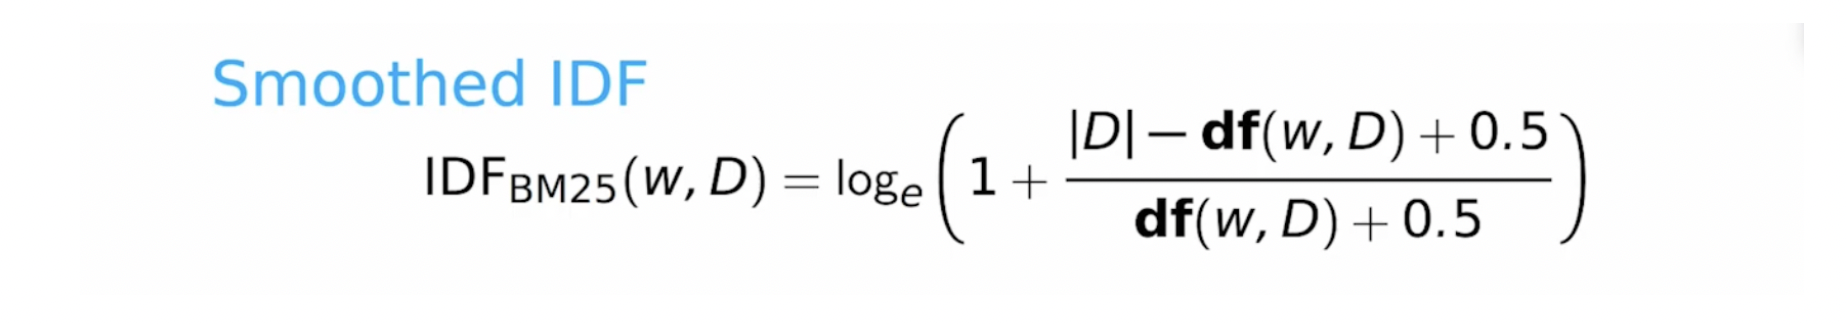

#### - Document Freqency df(w,D) : Number of documens that contains the target word w


In [8]:
import numpy as np
import math

np.log(math.e)

1.0

### Calculating the Smoothend IDF value for each of the unique word in the corpus

In [9]:
def IDF_BM25(word, s = 0.5) :
    count = 0 
    for doc in corpus :
        txt = remove_punctuation(doc).split(' ')[:-1]
        if word in txt :
            count+=1
    
    return np.log(1+ (len(corpus) - count + s)/(count + s))

IDF_BM25_dict = {}
for k, word in enumerate(unique_words_list): 
    IDF_BM25_dict[k]= IDF_BM25(word)
                
IDF_BM25_dict

{0: 1.3862943611198906,
 1: 0.5389965007326871,
 2: 0.0870113769896297,
 3: 1.3862943611198906,
 4: 0.0870113769896297,
 5: 0.5389965007326871,
 6: 1.3862943611198906,
 7: 0.0870113769896297,
 8: 1.3862943611198906}

### Printing the IDF-BM25 values of the unique words

In [10]:
def print_words_idf():
    for i in range(len(unique_words_list)) : 
        print(unique_words_list[i], IDF_BM25_dict[i])
print_words_idf()

third 1.3862943611198906
first 0.5389965007326871
is 0.0870113769896297
and 1.3862943611198906
this 0.0870113769896297
document 0.5389965007326871
one 1.3862943611198906
the 0.0870113769896297
second 1.3862943611198906


## BM25 Weight

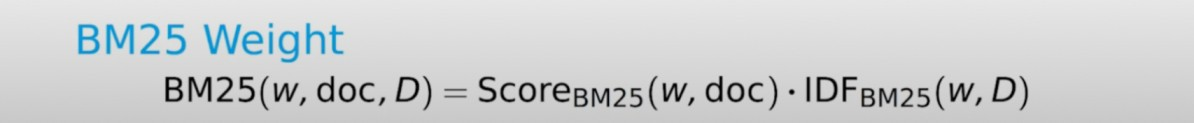

In [11]:
bm25_weight_dict = {}
for wd_tuple in tf_dict.keys():
    bm25_weight = scoring_dict[wd_tuple]*IDF_BM25_dict[wd_tuple[1]]
    bm25_weight_dict[wd_tuple] = bm25_weight
        
bm25_weight_dict

{(0, 0): 0.0,
 (0, 1): 0.19347137552615404,
 (0, 2): 0.031232504793119717,
 (0, 3): 0.0,
 (0, 4): 0.031232504793119717,
 (0, 5): 0.19347137552615404,
 (0, 6): 0.0,
 (0, 7): 0.031232504793119717,
 (0, 8): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.2621937328813785,
 (1, 2): 0.04232650435586838,
 (1, 3): 0.0,
 (1, 4): 0.04232650435586838,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.04232650435586838,
 (1, 8): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.023851189351658947,
 (2, 3): 0.0,
 (2, 4): 0.023851189351658947,
 (2, 5): 0.26275597819849367,
 (2, 6): 0.0,
 (2, 7): 0.023851189351658947,
 (2, 8): 0.38000512631984146,
 (3, 0): 0.38000512631984146,
 (3, 1): 0.0,
 (3, 2): 0.023851189351658947,
 (3, 3): 0.38000512631984146,
 (3, 4): 0.023851189351658947,
 (3, 5): 0.0,
 (3, 6): 0.38000512631984146,
 (3, 7): 0.023851189351658947,
 (3, 8): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.19347137552615404,
 (4, 2): 0.031232504793119717,
 (4, 3): 0.0,
 (4, 4): 0.031232504793119717,
 (4, 5): 0.19347137552615404,
 (4, 6): 0.0,
 (4,

## Converting EVERYTHING into a class

In [12]:
class BM25() : 
    def __init__(self, s= 0.5, k = 1.2, b = 0.4) : 
        self.feature_names = None 
        self.k =k
        self.b = b
        self.s = s
        self.avglen = None
    
    def avgdoclen(self, corpus) :  
        count = 0
        for i in corpus : 
            i = remove_punctuation(i)
            count += len(i.split(' '))
        self.avglen = count/len(corpus)
        return self.avglen
        
        
    def fit_transform(self, corpus) : 
        unique_words = set()
        for i in corpus : 
            only_txt = remove_punctuation(i)
            words = only_txt.split(' ')
            for j in range(len(words)-1) : 
                words[j] = words[j].lower()
                unique_words.add(words[j])   
        self.feature_names = list(unique_words)
        # Scoring_dict
        scoring_dict = {}
        for i,doc in enumerate(corpus) : 
            txt = remove_punctuation(doc).split(' ')[:-1]
            len_doc = len(txt)
            for j, word in enumerate(unique_words_list) : 
                    tfval = txt.count(word)/len_doc
                    scoring_dict[(i,j)] = tfval*(self.k+1)/(tfval + (self.k)*(1-(self.b)+(self.b)*len_doc/(avgdoclen(corpus))))
        # IDF_BM25
        IDF_BM25_dict = {}
        for k, word in enumerate(self.feature_names): 
            count = 0 
            for doc in corpus :
                txt = remove_punctuation(doc).split(' ')[:-1]
                if word in txt :
                    count+=1    
            IDF_BM25_dict[k]= np.log(1+ (len(corpus) - count + self.s)/(count + self.s))
        # BM_25 weight
        bm25_weight_dict = {}
        for wd_tuple in tf_dict.keys():
            bm25_weight = scoring_dict[wd_tuple]*IDF_BM25_dict[wd_tuple[1]]
            bm25_weight_dict[wd_tuple] = bm25_weight
        return bm25_weight_dict
        
             
    def print_feature_names(self):
        return self.feature_names
        
        

bm25_instance = BM25() 
X = bm25_instance.fit_transform(corpus)
bm25_instance.print_feature_names()

['third', 'first', 'is', 'and', 'this', 'document', 'one', 'the', 'second']

In [13]:
print(X)

{(0, 0): 0.0, (0, 1): 0.18143909846973968, (0, 2): 0.029290108147545634, (0, 3): 0.0, (0, 4): 0.029290108147545634, (0, 5): 0.18143909846973968, (0, 6): 0.0, (0, 7): 0.029290108147545634, (0, 8): 0.0, (1, 0): 0.0, (1, 1): 0.23165844057202714, (1, 2): 0.0373971257290947, (1, 3): 0.0, (1, 4): 0.0373971257290947, (1, 5): 0.0, (1, 6): 0.0, (1, 7): 0.0373971257290947, (1, 8): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.02361203211321322, (2, 3): 0.0, (2, 4): 0.02361203211321322, (2, 5): 0.26041060746648675, (2, 6): 0.0, (2, 7): 0.02361203211321322, (2, 8): 0.3761947932053818, (3, 0): 0.3761947932053818, (3, 1): 0.0, (3, 2): 0.02361203211321322, (3, 3): 0.3761947932053818, (3, 4): 0.02361203211321322, (3, 5): 0.0, (3, 6): 0.3761947932053818, (3, 7): 0.02361203211321322, (3, 8): 0.0, (4, 0): 0.0, (4, 1): 0.18143909846973968, (4, 2): 0.029290108147545634, (4, 3): 0.0, (4, 4): 0.029290108147545634, (4, 5): 0.18143909846973968, (4, 6): 0.0, (4, 7): 0.029290108147545634, (4, 8): 0.0}


## Creating a numpy array for storing the term document matrix with BM-25 values

In [14]:
import pandas as pd
def transformation(corpus, IDF_BM25_dict,bm25_weight_dict): 
    my_df = pd.DataFrame()
    term_doc_array = np.zeros((len(corpus), len(IDF_BM25_dict.keys())))
    for i in range(len(corpus)) : 
        for j in range(len(IDF_BM25_dict.keys())) : 
            term_doc_array[i][j] = bm25_weight_dict[(i,j)]
    return term_doc_array

term_doc_array = transformation(corpus, IDF_BM25_dict,bm25_weight_dict)

In [15]:
import pandas as pd
my_df = pd.DataFrame(term_doc_array, columns = unique_words_list)
my_df

,third,first,is,and,this,document,one,the,second
0,0.000000,0.193471,0.031233,0.000000,0.031233,0.193471,0.000000,0.031233,0.000000
1,0.000000,0.262194,0.042327,0.000000,0.042327,0.000000,0.000000,0.042327,0.000000
2,0.000000,0.000000,0.023851,0.000000,0.023851,0.262756,0.000000,0.023851,0.380005
3,0.380005,0.000000,0.023851,0.380005,0.023851,0.000000,0.380005,0.023851,0.000000
4,0.000000,0.193471,0.031233,0.000000,0.031233,0.193471,0.000000,0.031233,0.000000


## Searching with BM-25 values

- Let's say you calculated the BM25 score for each of the words in each document
- Now you want to find the most relevant document related to a word
- Document with highest BM25 weight for a word across all documents should be returned
- If we have multiple words as a query, we can have the summation of BM25 scores across the document in which they coexist and return the highest scoring document first 

## Implementing search for documents based on single word query

In [16]:
def search_doc(query, top_n_docs = 5) : 
    query = remove_punctuation(query) #Removing any punctuation
#     words = query.split(' ') #Splitting the query if it contains more than one word 
#     word_doc_list = []
#     for word in words : ## Searching over the words of the query
    if query in unique_words_list: 
        word_index = unique_words_list.index(query) #Getting the word index from the list
        for i,j in X :  #Iterating over the BM25Index weights 
            filtered_dict = {key: value for key, value in X.items() if key[1] == word_index} ## Filtering the keys for that word index
            sorted_dict = dict(sorted(filtered_dict.items(), key=lambda x: x[1], reverse=True)) ## Sorting based on BM25 values
        docs = [corpus[doc_id[0]] for doc_id in list(sorted_dict.keys())[0 : top_n_docs]] ## Getting all the relevant docs in sorted manner
    #         word_doc_list.append(docs)
    #     if len(words) == 1 : 
    #         return(word_doc_list[0])
    #     else : 
    #         docs = set(word_doc_list[0]).intersection(*word_doc_list[1:]) ## If the words are in all docs
    #         if docs is not None : 
    #             return docs
    #         else : 
    #             return (word_doc_list[0])
        return docs
    else :
        print('No such word in any document')
    
    
search_doc('document', top_n_docs = 2) ## Want the top 2 docs

['this document is the second document.', 'this is the first document.']

In [17]:
search_doc('third', top_n_docs = 1)

['and this is the third one.']

In [18]:
search_doc('first', top_n_docs = 2)

['this is the first ', 'this is the first document.']

In [19]:
search_doc('kaggle', top_n_docs = 2)

No such word in any document


## Important points : 
- Can be implemented for more than 1 words by searching for the top n documents for each word and then ranking [higher] the intersection of the documents list returned by each word

## References : 
1. https://www.youtube.com/watch?v=D3yL63aYNMQ&ab_channel=StanfordOnline